# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [222]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [223]:
data_df = pd.read_csv("bank.csv")

# Check the data. Check shape, data type, and info

In [224]:
data_df.shape

(515, 6)

In [225]:
data_df.dtypes

Bank                   int64
DD                     int64
Withdrawals            int64
Deposits               int64
Branch Area in sqft    int64
avg daily walkins      int64
dtype: object

In [226]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


In [227]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [228]:
data_df.tail()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
510,511,337,140,111,2640,694
511,512,168,131,60,2640,524
512,513,333,86,108,2850,676
513,514,192,176,34,2760,505
514,515,331,186,97,2700,767


# Checking Summary Statistic

In [229]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bank,515.0,258.000000,148.811962,1.0,129.5,258.0,386.5,515.0
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


# Checking for Duplicates

In [230]:
data_df[data_df.duplicated()==True].size

0

In [231]:
data_df[data_df.duplicated(subset='Bank')==True].size

0

# Scaling the data

In [232]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [233]:
# Creating an object for the StandardScaler function
scale=StandardScaler()
scaled_df=scale.fit_transform(data_df)
scaled_df

array([[-1.72869086, -0.07888413, -0.06497257,  1.02602411, -1.08710095,
         0.48432644],
       [-1.72196444, -1.64081915, -1.13811308, -0.58410514,  1.31763546,
        -1.949528  ],
       [-1.71523801,  1.10758573, -0.02978763, -0.19907423, -0.83517619,
         0.84400936],
       ...,
       [ 1.71523801,  1.51308809, -1.13811308,  0.92101568, -0.19391314,
         0.92793538],
       [ 1.72196444, -0.60453534,  0.44520899, -1.66919225, -0.40003341,
        -1.12225728],
       [ 1.72869086,  1.48305088,  0.62113366,  0.53598477, -0.53744692,
         2.01897357]])

# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [234]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [235]:
# Fit K means on the scaled_df
k_means=k_means.fit(scaled_df)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Check cluster Output for all the observations

In [236]:
# Get the labels
k_means.labels_

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

### Calculate within Cluster Sum of Squares

In [237]:
k_means.inertia_

2447.950426054663

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [249]:
wss=[]
K=[1,3,4,5,6]
for k in K:
    k_means=KMeans(n_clusters=k)
    k_means=k_means.fit(scaled_df)
    wss.append(k_means.inertia_)
    print("No. of Clusters:",k ,"WSS:",k_means.inertia_)

No. of Clusters: 1 WSS: 3090.0
No. of Clusters: 3 WSS: 2101.905282734829
No. of Clusters: 4 WSS: 1852.0266511394784
No. of Clusters: 5 WSS: 1700.6763019844943
No. of Clusters: 6 WSS: 1567.9937552976226


### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

In [239]:
wss =[] 
import numpy as np
K=np.arange(1,21)
K

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [240]:
for k in K:
    k_means=KMeans(n_clusters=k)
    k_means=k_means.fit(scaled_df)
    wss.append(k_means.inertia_)
    print("No. of Clusters:",k ,"WSS:",k_means.inertia_)

No. of Clusters: 1 WSS: 3090.0
No. of Clusters: 2 WSS: 2447.950426054663
No. of Clusters: 3 WSS: 2101.882515528786
No. of Clusters: 4 WSS: 1852.024523120691
No. of Clusters: 5 WSS: 1702.8576021598756
No. of Clusters: 6 WSS: 1570.346833002534
No. of Clusters: 7 WSS: 1470.285047017252
No. of Clusters: 8 WSS: 1391.040646011624
No. of Clusters: 9 WSS: 1314.0396858085219
No. of Clusters: 10 WSS: 1259.9939039161359
No. of Clusters: 11 WSS: 1202.363876214834
No. of Clusters: 12 WSS: 1140.217278385519
No. of Clusters: 13 WSS: 1098.3626068948129
No. of Clusters: 14 WSS: 1050.3946790900873
No. of Clusters: 15 WSS: 1022.611481717016
No. of Clusters: 16 WSS: 992.9581058296026
No. of Clusters: 17 WSS: 959.674591301678
No. of Clusters: 18 WSS: 931.0560898069857
No. of Clusters: 19 WSS: 900.045292196381
No. of Clusters: 20 WSS: 879.22396290437


Text(0, 0.5, 'Sum of Squares')

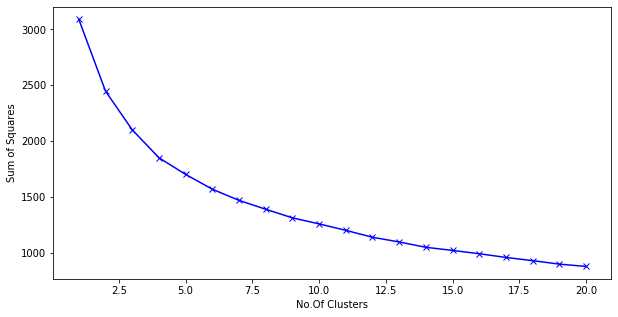

In [241]:
plt.figure(figsize=(10, 5))
plt.plot(K,wss,'bx-')
plt.xlabel("No.Of Clusters")
plt.ylabel('Sum of Squares')

## Build a KMeans model with K=3

In [242]:
k_means=KMeans(n_clusters=3)
k_means=k_means.fit(scaled_df)
print(k_means.inertia_)


2101.882515528786


### Use silhouette score to evaluate the above model ( 3 clusters)

In [243]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [244]:
# Calculating silhouette_score
silhouette_score(scaled_df, labels=k_means.labels_)

0.17805387367814587

# Build a KMeans model with K=4

### Use silhouette score to evaluate the above model ( 4 clusters)

In [245]:
#from sklearn.metrics import silhouette_samples, silhouette_score
k_means=KMeans(n_clusters=4)
k_means=k_means.fit(scaled_df)
print(k_means.inertia_)
print(silhouette_score(scaled_df, labels=k_means.labels_))
k_means.labels_

1852.5176979398875
0.18601645296883526


array([2, 3, 0, 1, 2, 2, 3, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 3, 0, 1, 2,
       2, 2, 0, 1, 2, 2, 3, 0, 2, 0, 3, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 3, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2,
       3, 1, 1, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 1,
       1, 0, 0, 2, 3, 2, 0, 2, 0, 2, 1, 0, 2, 3, 0, 1, 0, 2, 3, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 1, 1, 2, 2, 0,
       3, 0, 0, 3, 3, 3, 2, 2, 2, 1, 0, 3, 1, 3, 2, 2, 1, 1, 0, 3, 3, 2,
       2, 1, 3, 1, 1, 3, 0, 1, 3, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 0,
       0, 1, 1, 1, 0, 3, 2, 2, 0, 2, 0, 2, 2, 1, 3, 2, 2, 2, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 3, 2, 3, 3, 2, 3, 0, 1, 1, 3, 1, 2, 2, 0, 3, 1, 3,
       2, 1, 3, 3, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 2, 0, 0,

Appending Clusters to the original dataset

In [246]:
labels=pd.Series(k_means.labels_)
labels
data_df["Clus_kmeans4"]=k_means.labels_
data_df

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
0,1,227,147,111,2460,639,2
1,2,123,86,65,3510,436,3
2,3,306,149,76,2570,669,0
3,4,251,112,129,3650,623,1
4,5,174,135,128,3400,579,2
...,...,...,...,...,...,...,...
510,511,337,140,111,2640,694,0
511,512,168,131,60,2640,524,3
512,513,333,86,108,2850,676,1
513,514,192,176,34,2760,505,3


# Cluster Profiling

In [247]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    121
1    143
2    135
3    116
Name: Clus_kmeans4, dtype: int64

In [248]:
clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans4,,,,,,
0,286.380165,193.504132,84.933884,2622.066116,698.264463,121
1,289.000000,102.713287,76.363636,3116.993007,598.489510,143
2,182.592593,192.022222,89.607407,2936.074074,600.666667,135
3,163.629310,117.086207,75.646552,3034.353448,492.387931,116


# Mention your insights

Cluster 0- Small size bank with highest walkins and withdrawals, and a relatively large DD and deposits

Cluster 1- Large size Bank with highest DD and lowest withdrawals, and a relatively lower deposits.

Cluster 2- Medium size bank with highest deposits and a higher number of withdrawals and with a relatively lower DD.

Cluster 3- Medium size bank with lowest walkins,deposits and DD and a relatively lower withdrawals.

Consequently, banks with lowest walkins,deposit,DD and lower withdrwals imply activity in these banks are very less. Banks in cluster 3 can be considered as banks with less activities.

Branch Area in sqft can be reduced for the banks in cluster 3 ,whereas Cluster 0 with highest number of average walkins can be expanded(Area expansion) as it has higher number of activities in terms of walkins,deposit,withdrawals,DD but are not spacious.